In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pymc3 as pm
import theano

In [3]:
elements = pd.read_csv('pd_data/elements_men.csv')
components = pd.read_csv('pd_data/components_summary_men.csv')
elements.date = elements.date.astype('datetime64')
components.date = components.date.astype('datetime64')

/anaconda/lib/python2.7/site-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [4]:
skaters = sorted(elements.skater.unique())
num_skaters = len(skaters)
skater_lookup = dict(zip(skaters, xrange(len(skaters))))

In [5]:
skater_start = {}
for skater in elements.skater.unique():
    skater_elts = elements[elements.skater == skater]
    skater_start[skater] = skater_elts.date.unique()[0]

In [8]:
elements['weeks_since_skater_start'] = elements.apply(
    lambda row: row.date - skater_start[row.skater], axis=1
).astype('timedelta64[W]')
components['weeks_since_skater_start'] = components.apply(
    lambda row: row.date - skater_start[row.skater], axis=1
).astype('timedelta64[W]')

overall_start = elements.date.unique()[0]
elements['weeks_since_overall_start'] = elements.apply(
    lambda row: row.date - overall_start, axis=1
).astype('timedelta64[W]')
components['weeks_since_overall_start'] = components.apply(
    lambda row: row.date - overall_start, axis=1
).astype('timedelta64[W]')

In [9]:
elements['log_skater_start'] = elements.apply(lambda row: -1 if row.weeks_since_skater_start == 0
                                                          else np.log(row.weeks_since_skater_start), axis=1)
elements['log_overall_start'] = elements.apply(lambda row: -1 if row.weeks_since_overall_start == 0
                                                           else np.log(row.weeks_since_overall_start), axis=1)
components['log_skater_start'] = components.apply(lambda row: -1 if row.weeks_since_skater_start == 0
                                                                 else np.log(row.weeks_since_skater_start), axis=1)
components['log_overall_start'] = elements.apply(lambda row: -1 if row.weeks_since_overall_start == 0
                                                             else np.log(row.weeks_since_overall_start), axis=1)

In [10]:
elements.columns

Index([u'Unnamed: 0', u'base_value', u'bonus', u'date', u'element',
       u'elt_type', u'event', u'goe', u'info', u'number', u'points',
       u'segment', u'segment_rank', u'skater', u'start_order',
       u'weeks_since_skater_start', u'weeks_since_overall_start',
       u'log_skater_start', u'log_overall_start'],
      dtype='object')

In [17]:
elements['is_gpf'] = elements.apply(lambda row: 1 if row.event.startswith('gpf') and not row.event.startswith('gpfra') else 0, axis=1)
elements['is_ecfc'] = elements.apply(lambda row: 1 if row.event.startswith('ec') or row.event.startswith('fc') else 0, axis=1)
elements['is_wc'] = elements.apply(lambda row: 1 if row.event.startswith('wc') else 0, axis=1)
elements['is_owg'] = elements.apply(lambda row: 1 if row.event.startswith('owg') else 0, axis=1)

In [26]:
components['is_gpf'] = components.apply(lambda row: 1 if row.event.startswith('gpf') and not row.event.startswith('gpfra') else 0, axis=1)
components['is_ecfc'] = components.apply(lambda row: 1 if row.event.startswith('ec') or row.event.startswith('fc') else 0, axis=1)
components['is_wc'] = components.apply(lambda row: 1 if row.event.startswith('wc') else 0, axis=1)
components['is_owg'] = components.apply(lambda row: 1 if row.event.startswith('owg') else 0, axis=1)

In [23]:
ELT_TYPES = ('ch', 'st', 'sp', '1j', '2j', '3j', '4j')
COMP_TYPES = ('ss', 'tr', 'pe', 'co', 'in')

In [24]:
results = {}  # dict of (trace, model, theano shared)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 1499/1500 [04:28<00:00,  5.58it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 161 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1500/1500 [04:28<00:00,  5.58it/s]


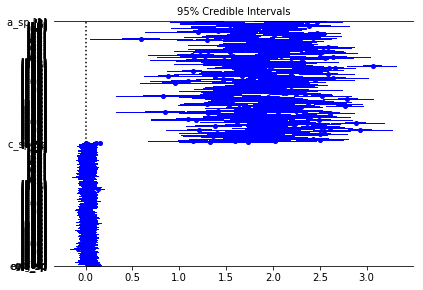

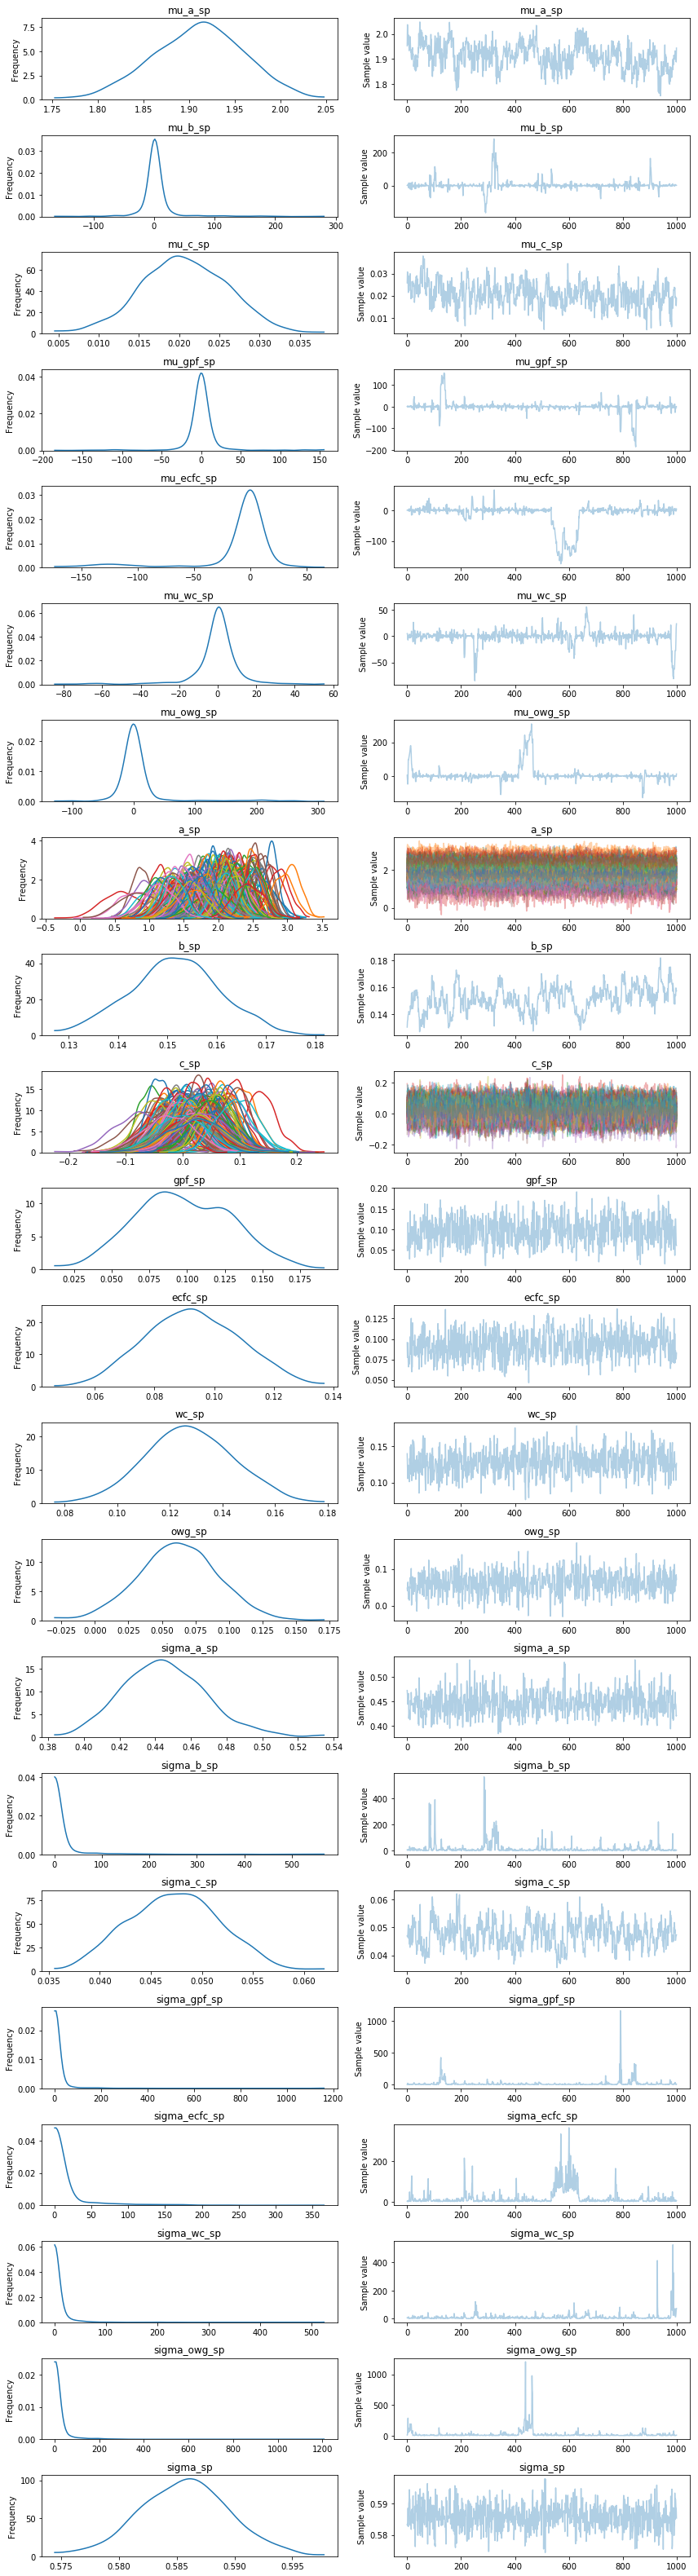

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [02:03<00:00, 12.13it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 157 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))



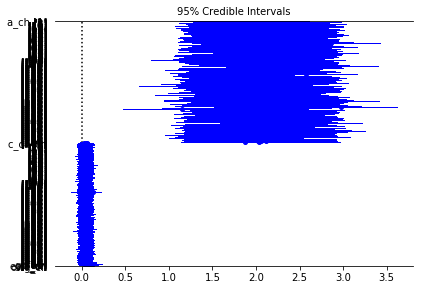

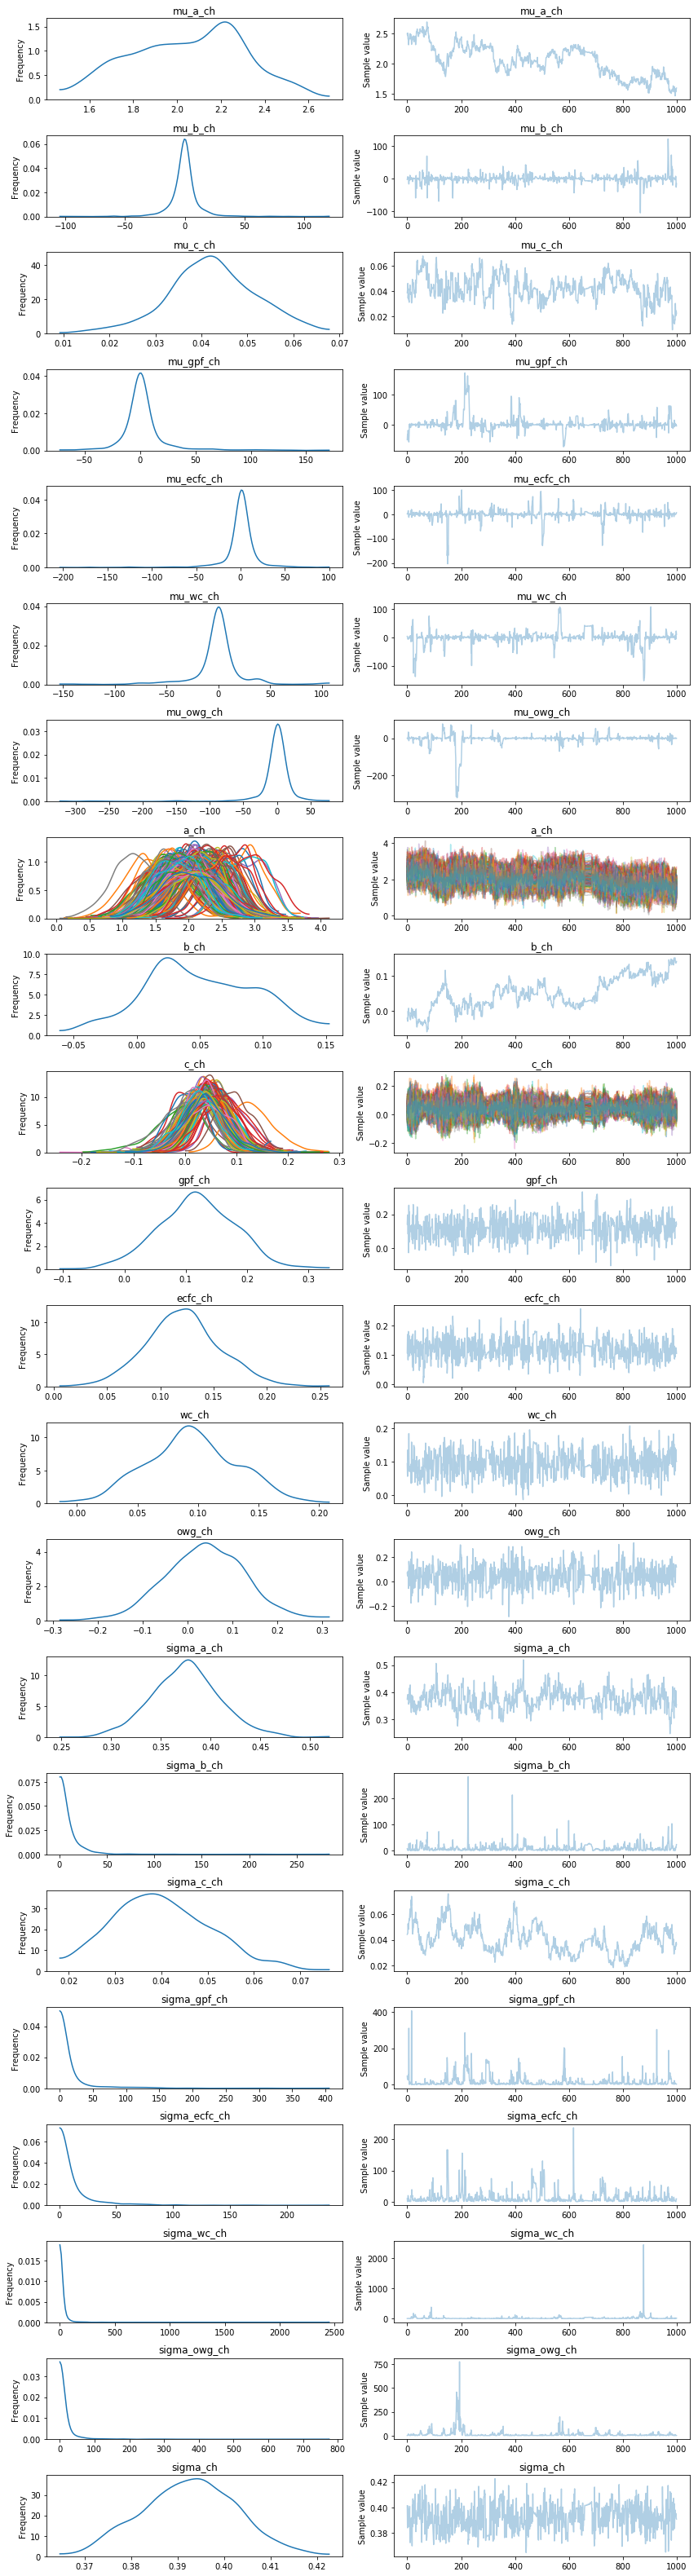

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 99%|█████████▉| 1489/1500 [02:59<00:01,  8.29it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.504789539888, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 469 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1500/1500 [02:59<00:00,  8.34it/s]


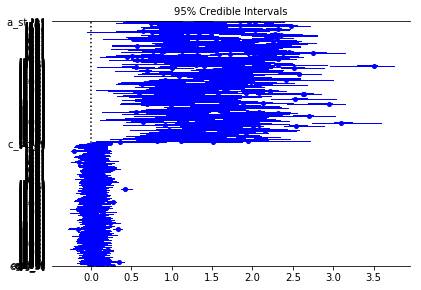

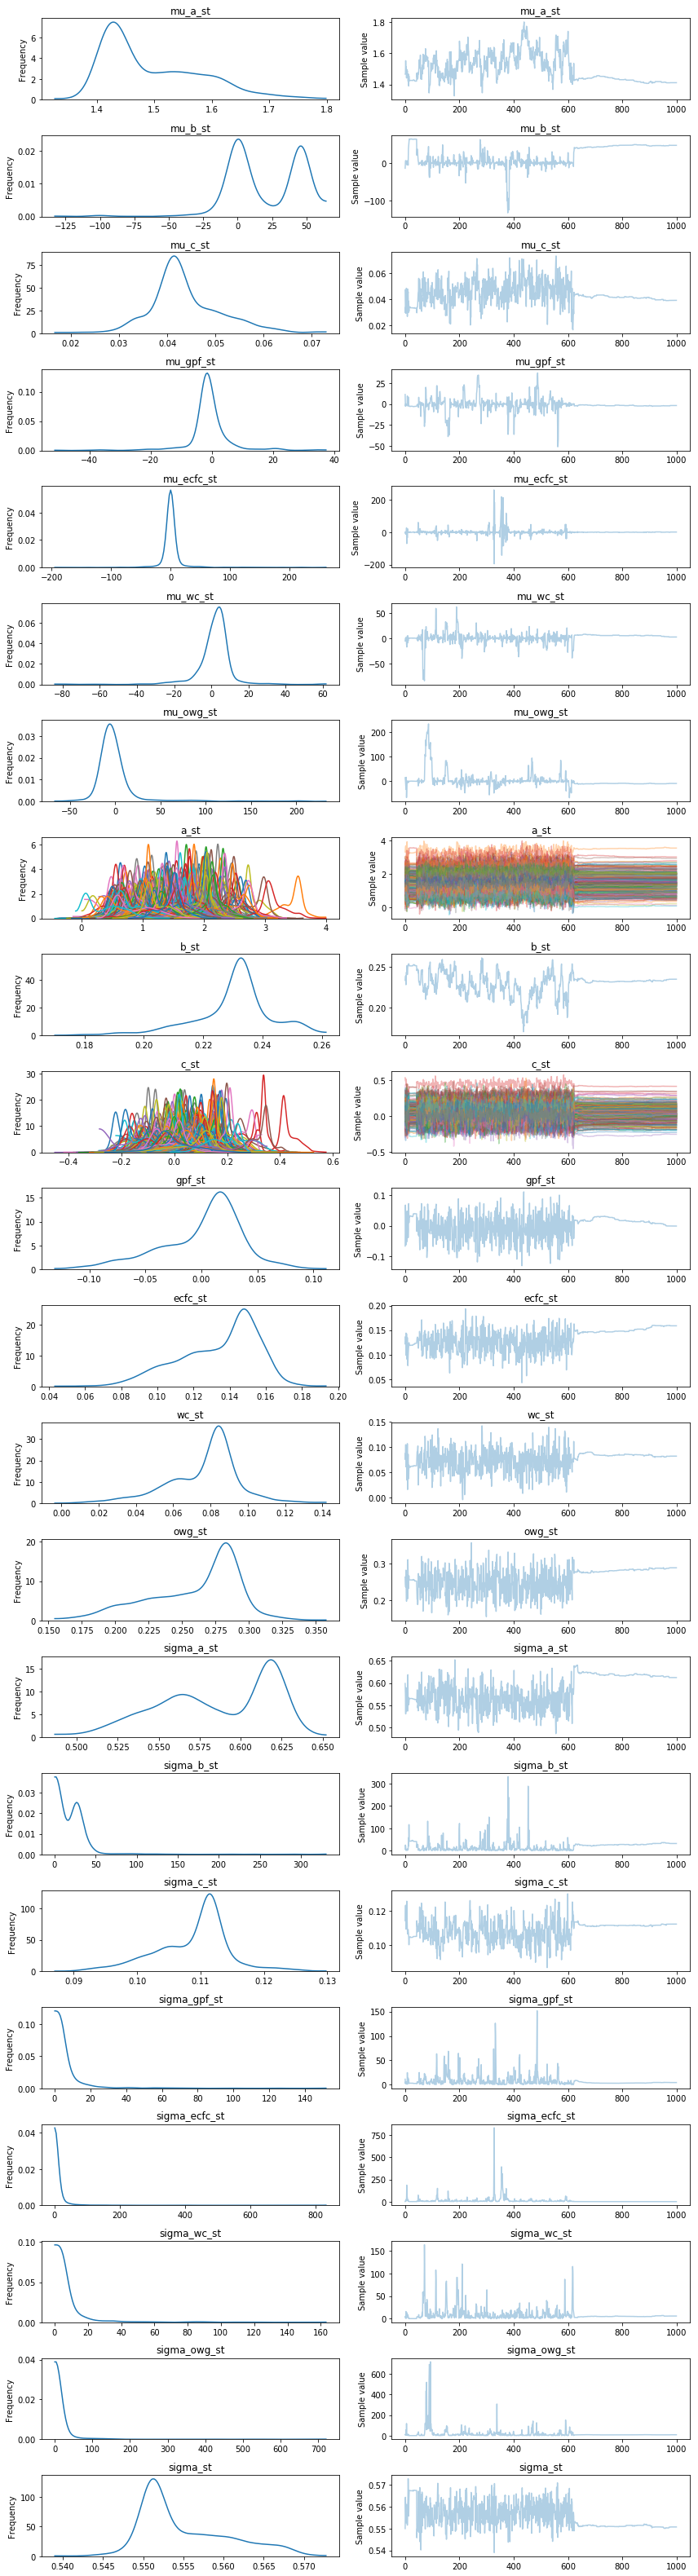

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 1499/1500 [01:11<00:00, 21.07it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.627930191021, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 248 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1500/1500 [01:11<00:00, 21.07it/s]


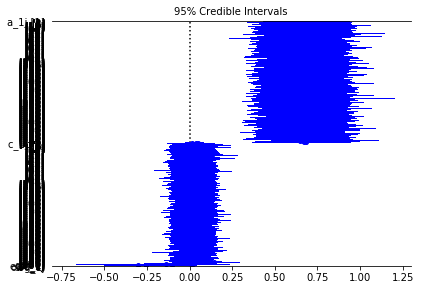

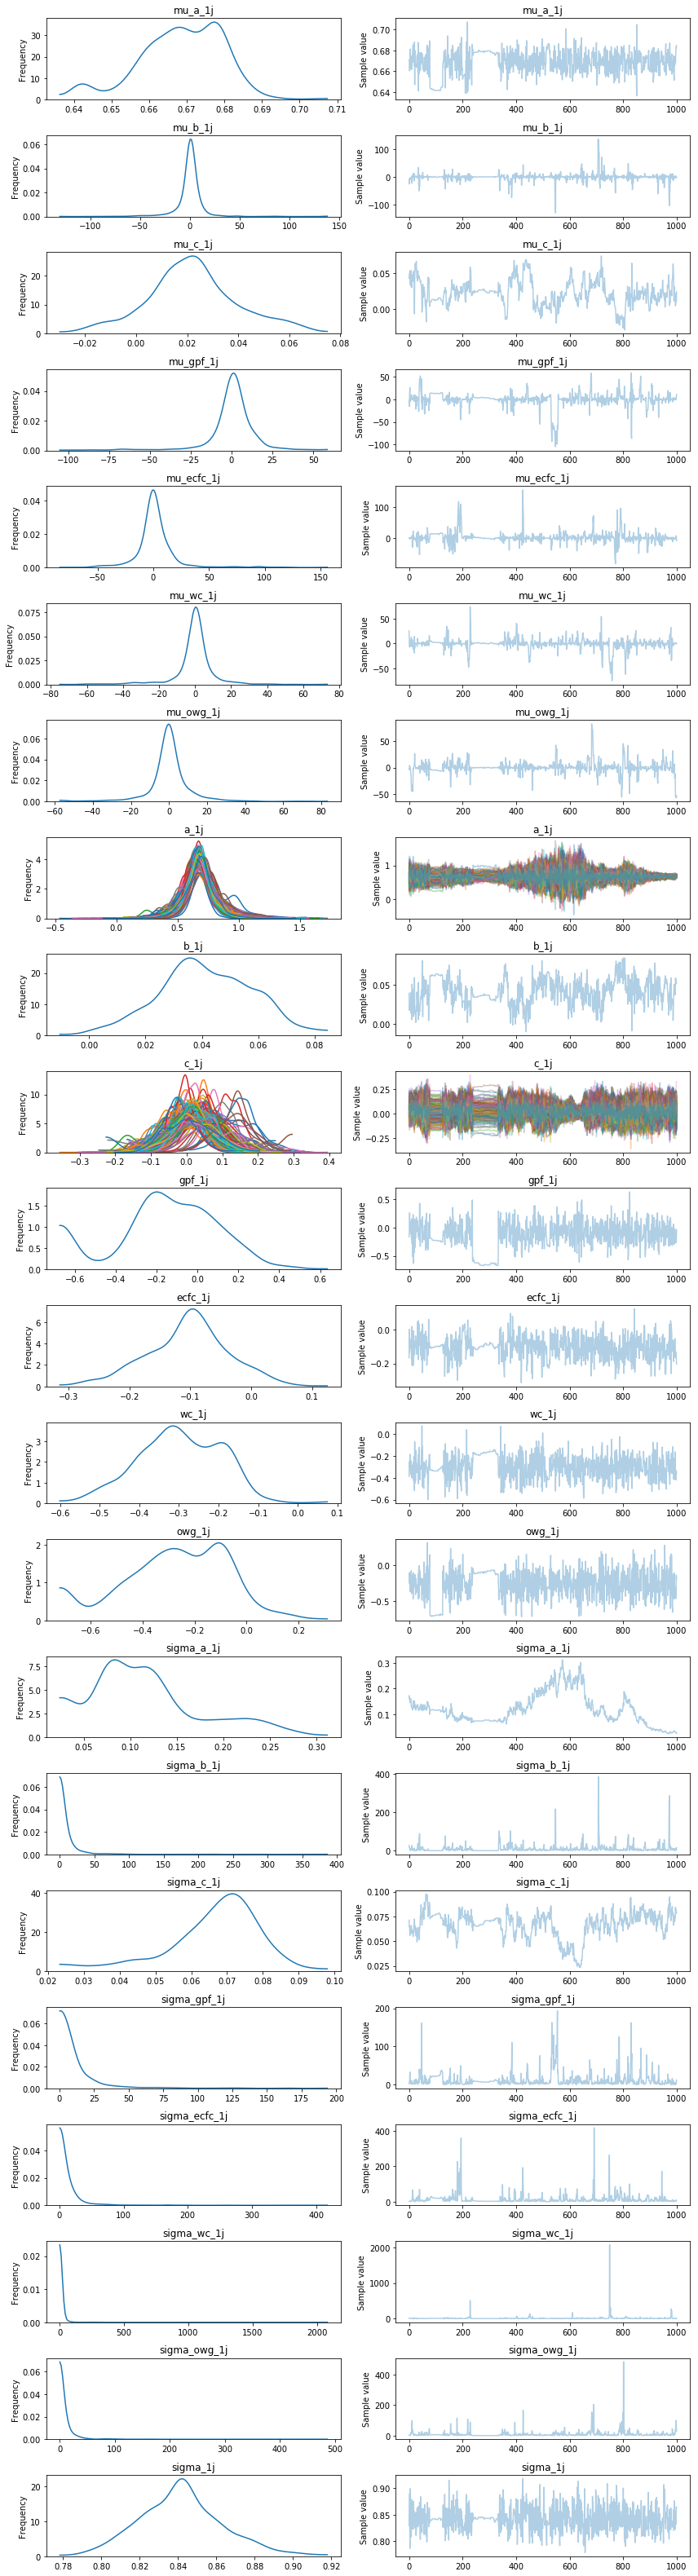

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 1499/1500 [02:05<00:00, 11.94it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 176 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1500/1500 [02:05<00:00, 11.94it/s]


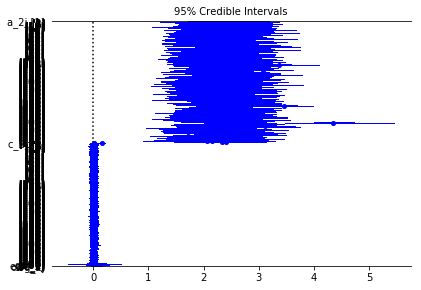

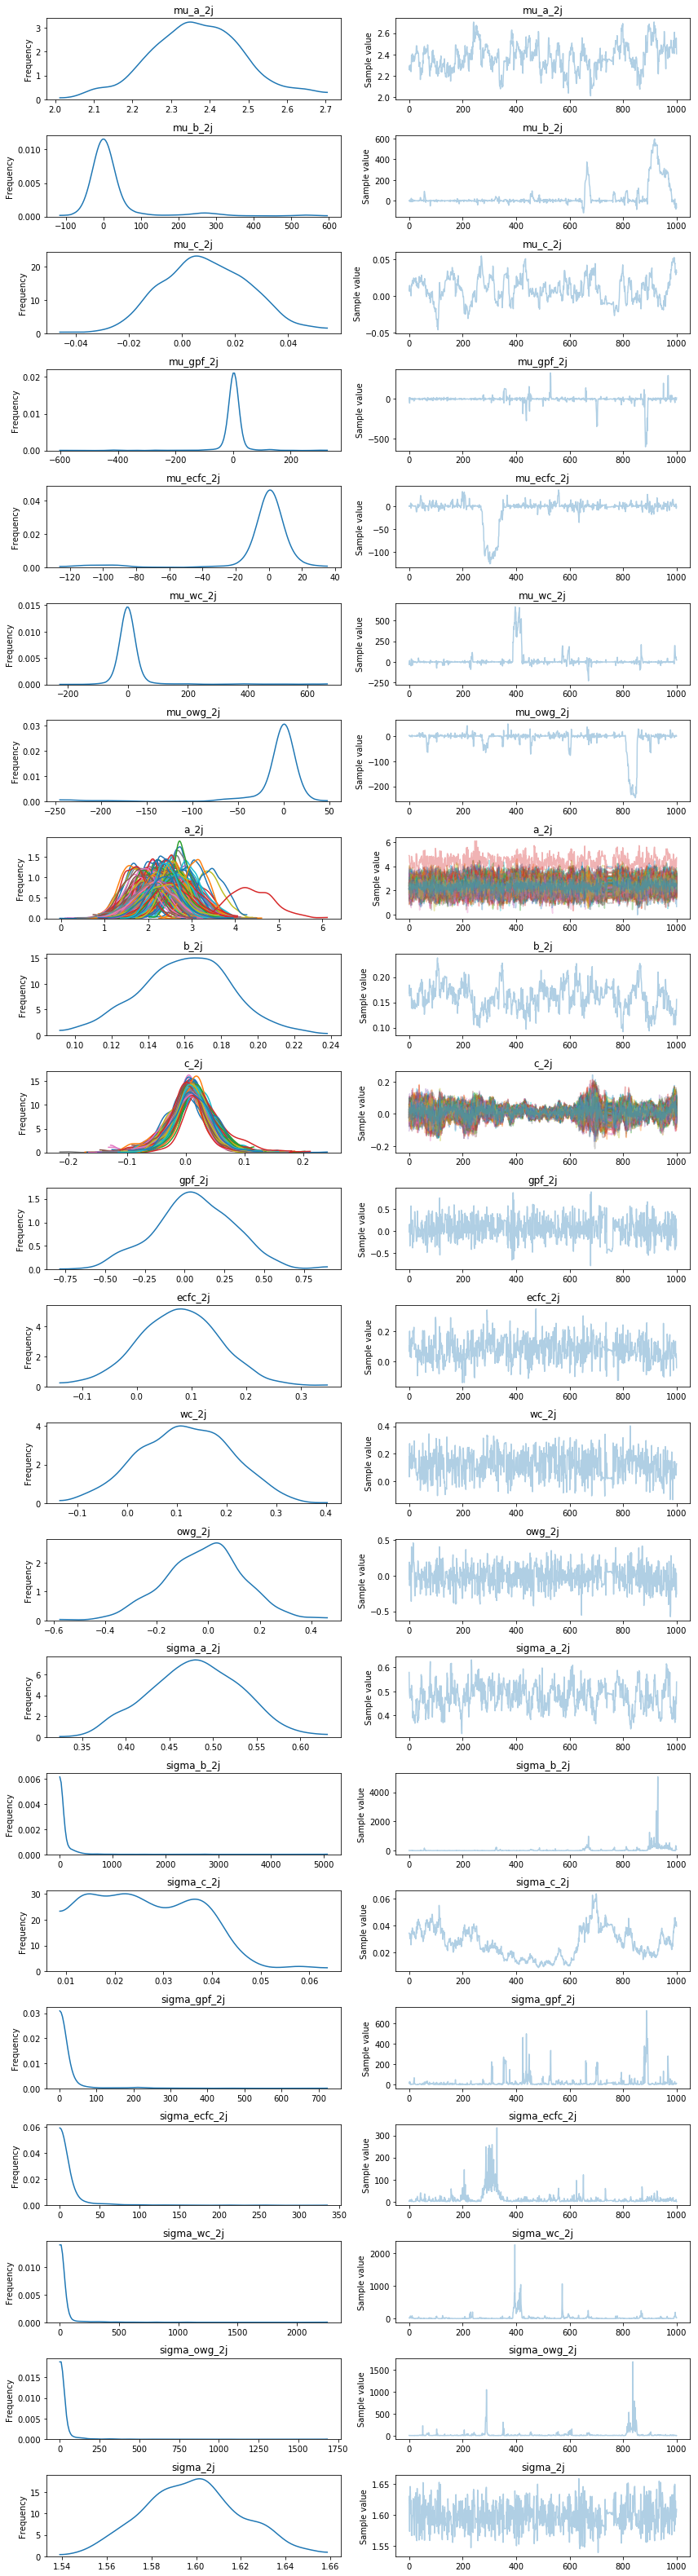

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [05:02<00:00,  4.96it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.717804890454, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 183 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))



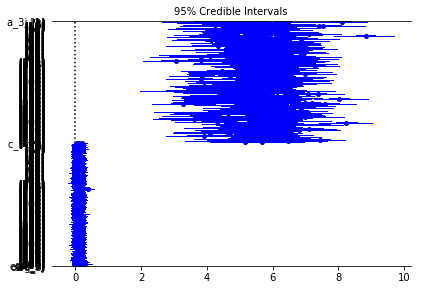

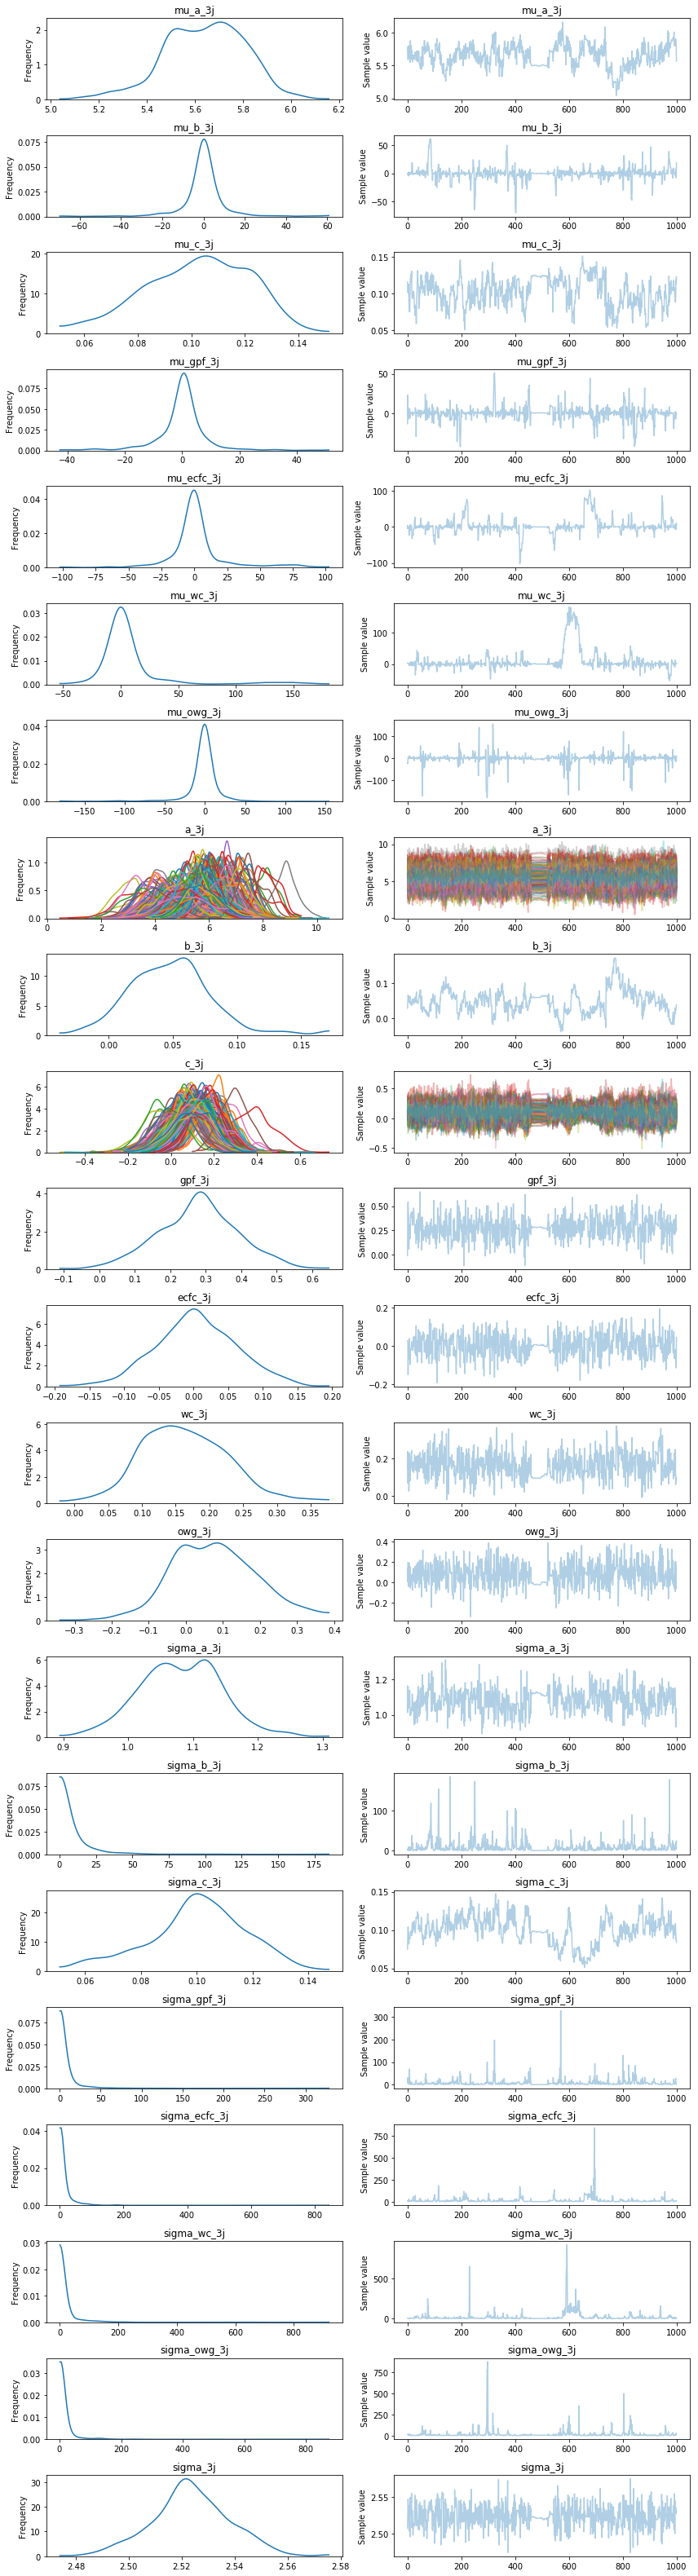

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [01:45<00:00, 14.18it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 117 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))



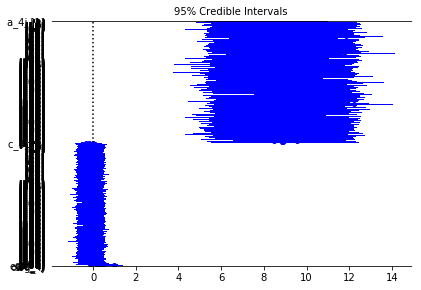

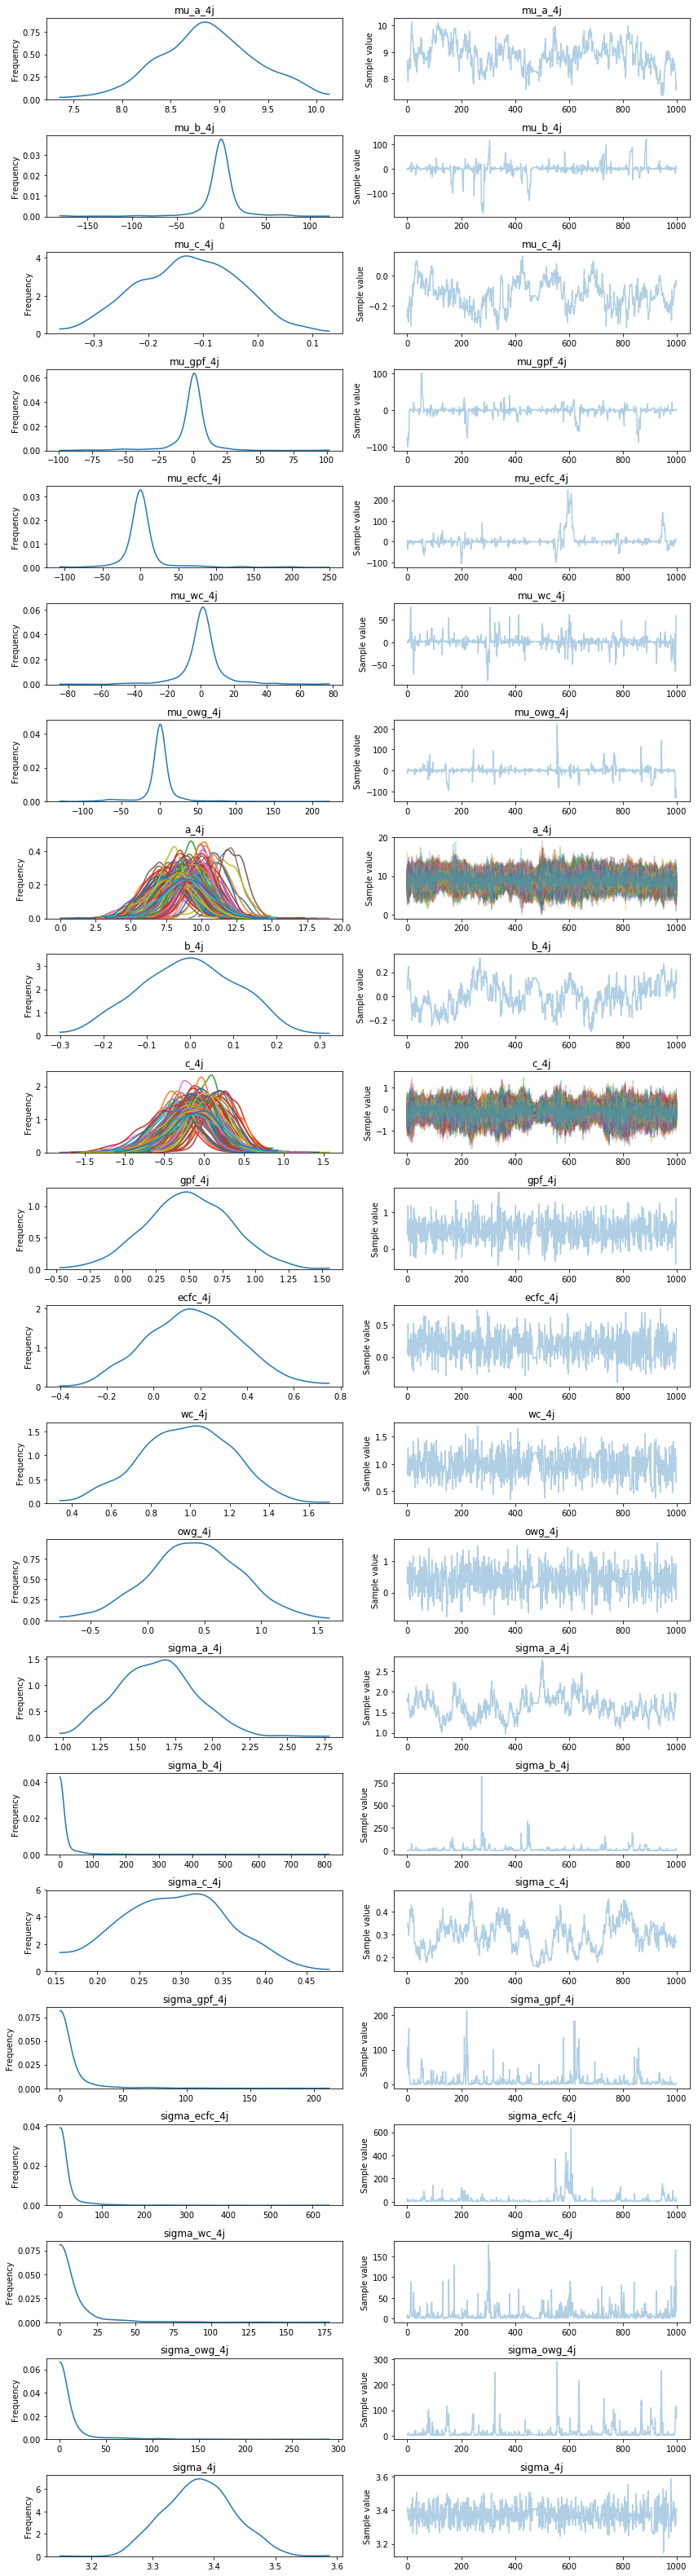

In [25]:
for elt_type, prior_mu, prior_sd in (('sp', 2.5, 0.5), ('ch', 2., 0.5), ('st', 3., 0.5), 
                                     ('1j', 0.67, 0.01), ('2j', 4., 0.5), ('3j', 6., 0.7), ('4j', 10.5, 1.0)):
    elts = elements[elements.elt_type == elt_type]
    
    # Predictors/group indicators.
    skater = elts['skater_code'] = elts.skater.replace(skater_lookup).values
    skater = theano.shared(skater)
    start_overall = np.asarray(elts.log_overall_start)
    start_overall = theano.shared(start_overall)
    start_skater = np.asarray(elts.log_skater_start)
    start_skater = theano.shared(start_skater)
    is_gpf = theano.shared(np.asarray(elts.is_gpf))
    is_ecfc = theano.shared(np.asarray(elts.is_ecfc))
    is_wc = theano.shared(np.asarray(elts.is_wc))
    is_owg = theano.shared(np.asarray(elts.is_owg))
    
    points = elts.points
    
    model = pm.Model()
    with model:
        # Prior on group distribution.
        mu_a = pm.Normal('mu_a_' + elt_type, prior_mu, sd=prior_sd)
        sigma_a = pm.HalfCauchy('sigma_a_' + elt_type, 5)
        mu_b = pm.Normal('mu_b_' + elt_type, mu=0., sd=1e5)
        sigma_b = pm.HalfCauchy('sigma_b_' + elt_type, 5)
        mu_c = pm.Normal('mu_c_' + elt_type, mu=0., sd=1e5)
        sigma_c = pm.HalfCauchy('sigma_c_' + elt_type, 5)
        mu_gpf = pm.Normal('mu_gpf_' + elt_type, mu=0., sd=1e5)
        sigma_gpf = pm.HalfCauchy('sigma_gpf_' + elt_type, 5)
        mu_ecfc = pm.Normal('mu_ecfc_' + elt_type, mu=0., sd=1e5)
        sigma_ecfc = pm.HalfCauchy('sigma_ecfc_' + elt_type, 5)
        mu_wc = pm.Normal('mu_wc_' + elt_type, mu=0., sd=1e5)
        sigma_wc = pm.HalfCauchy('sigma_wc_' + elt_type, 5)
        mu_owg = pm.Normal('mu_owg_' + elt_type, mu=0., sd=1e5)
        sigma_owg = pm.HalfCauchy('sigma_owg_' + elt_type, 5)
        
        # Group distribution.
        a = pm.Normal('a_' + elt_type, mu_a, sd=sigma_a, shape=num_skaters)
        b = pm.Normal('b_' + elt_type, mu_b, sd=sigma_b)
        c = pm.Normal('c_' + elt_type, mu_c, sd=sigma_c, shape=num_skaters)
        gpf = pm.Normal('gpf_' + elt_type, mu_gpf, sd=sigma_gpf)
        ecfc = pm.Normal('ecfc_' + elt_type, mu_ecfc, sd=sigma_ecfc)
        wc = pm.Normal('wc_' + elt_type, mu_wc, sd=sigma_wc)
        owg = pm.Normal('owg_' + elt_type, mu_owg, sd=sigma_owg)
        sigma = pm.HalfCauchy('sigma_' + elt_type, 5)
        
        y_hat = (a[skater] + b * start_overall + c[skater] * start_skater + 
                 gpf * is_gpf + ecfc * is_ecfc + wc * is_wc + owg * is_owg)
        
        # Data model.
        y = pm.Normal('y_' + elt_type, y_hat, sd=sigma, observed=points)

    # Fit the model.
    with model:
        trace = pm.sample(draws=1000, tune=500)
        
    # Save the results.
    results[elt_type] = (trace, model, (skater, start_overall, start_skater, is_gpf, is_ecfc, is_wc, is_owg))
    
    # Visualize fit.
    pm.forestplot(trace, varnames=[var + '_' + elt_type for var in ('a', 'b', 'c', 'gpf', 'ecfc', 'wc', 'owg')])
    pm.traceplot(trace)
    plt.show()
#     estimates = pd.Series(trace['mu_' + elt_type].mean(axis=0), index=skaters)
#     se = pd.Series(trace['mu_' + elt_type].std(axis=0), index=skaters)
#     order = estimates.sort_values().index
#     plt.scatter(xrange(len(estimates)), estimates[order])
#     for i, m, s in zip(range(len(estimates)), estimates[order], se[order]):
#         plt.plot([i,i], [m-s, m+s], 'b-')
#     plt.ylabel(elt_type + ' Points');plt.xlabel('Ordered Skater');

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [13:54<00:00,  1.80it/s]/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 86 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))



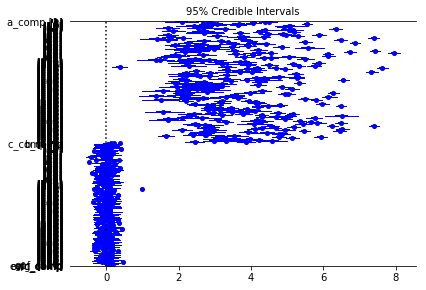

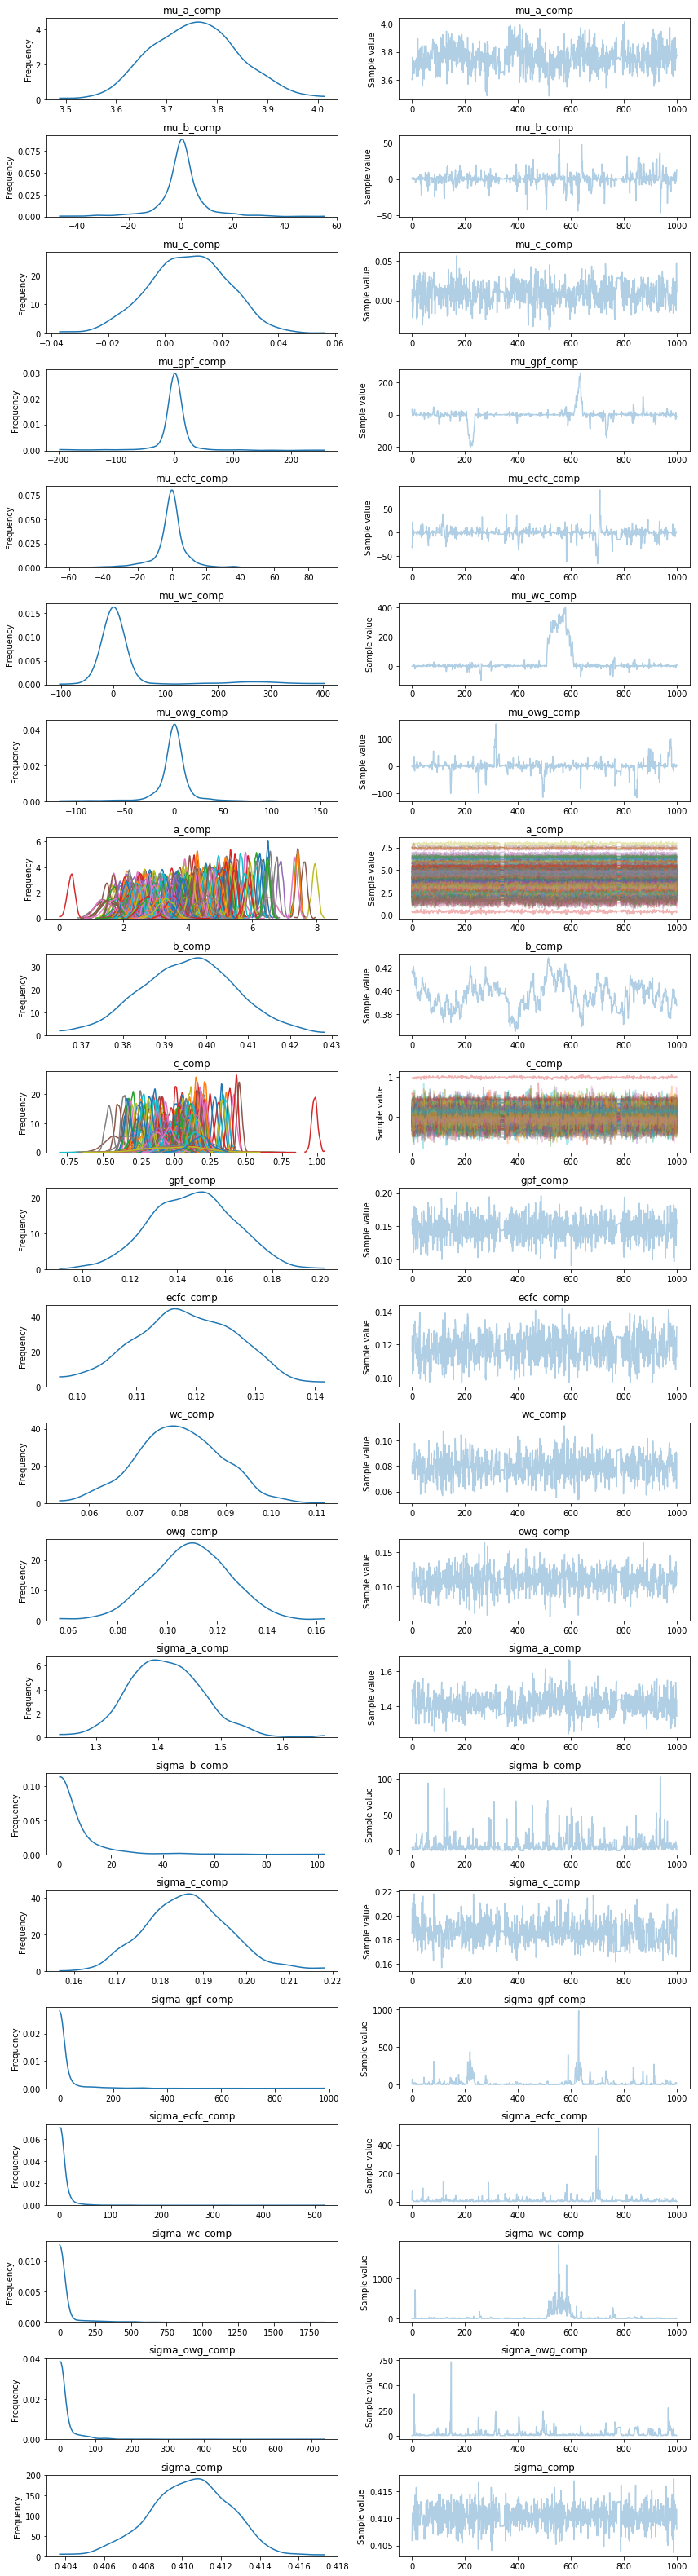

In [28]:
comp_type = 'comp'

# Predictors/group indicators.
skater = components['skater_code'] = components.skater.replace(skater_lookup).values
skater = theano.shared(skater)
start_overall = np.asarray(components.log_overall_start)
start_overall = theano.shared(start_overall)
start_skater = np.asarray(components.log_skater_start)
start_skater = theano.shared(start_skater)
is_gpf = theano.shared(np.asarray(components.is_gpf))
is_ecfc = theano.shared(np.asarray(components.is_ecfc))
is_wc = theano.shared(np.asarray(components.is_wc))
is_owg = theano.shared(np.asarray(components.is_owg))

points = components.points

model = pm.Model()
with model:
    # Prior on group distribution.
    mu_a = pm.Normal('mu_a_' + comp_type, prior_mu, sd=prior_sd)
    sigma_a = pm.HalfCauchy('sigma_a_' + comp_type, 5)
    mu_b = pm.Normal('mu_b_' + comp_type, mu=0., sd=1e5)
    sigma_b = pm.HalfCauchy('sigma_b_' + comp_type, 5)
    mu_c = pm.Normal('mu_c_' + comp_type, mu=0., sd=1e5)
    sigma_c = pm.HalfCauchy('sigma_c_' + comp_type, 5)
    mu_gpf = pm.Normal('mu_gpf_' + comp_type, mu=0., sd=1e5)
    sigma_gpf = pm.HalfCauchy('sigma_gpf_' + comp_type, 5)
    mu_ecfc = pm.Normal('mu_ecfc_' + comp_type, mu=0., sd=1e5)
    sigma_ecfc = pm.HalfCauchy('sigma_ecfc_' + comp_type, 5)
    mu_wc = pm.Normal('mu_wc_' + comp_type, mu=0., sd=1e5)
    sigma_wc = pm.HalfCauchy('sigma_wc_' + comp_type, 5)
    mu_owg = pm.Normal('mu_owg_' + comp_type, mu=0., sd=1e5)
    sigma_owg = pm.HalfCauchy('sigma_owg_' + comp_type, 5)

    # Group distribution.
    a = pm.Normal('a_' + comp_type, mu_a, sd=sigma_a, shape=num_skaters)
    b = pm.Normal('b_' + comp_type, mu_b, sd=sigma_b)
    c = pm.Normal('c_' + comp_type, mu_c, sd=sigma_c, shape=num_skaters)
    gpf = pm.Normal('gpf_' + comp_type, mu_gpf, sd=sigma_gpf)
    ecfc = pm.Normal('ecfc_' + comp_type, mu_ecfc, sd=sigma_ecfc)
    wc = pm.Normal('wc_' + comp_type, mu_wc, sd=sigma_wc)
    owg = pm.Normal('owg_' + comp_type, mu_owg, sd=sigma_owg)
    sigma = pm.HalfCauchy('sigma_' + comp_type, 5)

    y_hat = (a[skater] + b * start_overall + c[skater] * start_skater + 
             gpf * is_gpf + ecfc * is_ecfc + wc * is_wc + owg * is_owg)

    # Data model.
    y = pm.Normal('y_' + comp_type, y_hat, sd=sigma, observed=points)

# Fit the model.
with model:
    trace = pm.sample(draws=1000, tune=500)

# Save the results.
results['component'] = (trace, model, (skater, start_overall, start_skater, is_gpf, is_ecfc, is_wc, is_owg))

# Visualize fit.
pm.forestplot(trace, varnames=[var + '_' + comp_type for var in ('a', 'b', 'c', 'gpf', 'ecfc', 'wc', 'owg')])
pm.traceplot(trace)
plt.show()
#     estimates = pd.Series(trace['mu_' + elt_type].mean(axis=0), index=skaters)
#     se = pd.Series(trace['mu_' + elt_type].std(axis=0), index=skaters)
#     order = estimates.sort_values().index
#     plt.scatter(xrange(len(estimates)), estimates[order])
#     for i, m, s in zip(range(len(estimates)), estimates[order], se[order]):
#         plt.plot([i,i], [m-s, m+s], 'b-')
#     plt.ylabel(elt_type + ' Points');plt.xlabel('Ordered Skater');

In [30]:
elements18 = pd.read_csv('pd_data/elements18_men.csv')
components18 = pd.read_csv('pd_data/components_summary18_men.csv')
elements18.date = elements18.date.astype('datetime64')
components18.date = components18.date.astype('datetime64')

In [31]:
elements18['skater_code'] = elements18.apply(lambda row: skater_lookup.get(row.skater, -1), axis=1)
components18['skater_code'] = components18.apply(lambda row: skater_lookup.get(row.skater, -1), axis=1)

In [32]:
# Update skater_start for new data.
for skater in elements18.skater.unique():
    if skater in skater_start:
        continue
    skater_elts = elements18[elements18.skater == skater]
    skater_start[skater] = skater_elts.date.unique()[0]

In [33]:
elements18['weeks_since_skater_start'] = elements18.apply(
    lambda row: row.date - skater_start[row.skater], axis=1
).astype('timedelta64[W]')
components18['weeks_since_skater_start'] = components18.apply(
    lambda row: row.date - skater_start[row.skater], axis=1
).astype('timedelta64[W]')

In [34]:
elements18['weeks_since_overall_start'] = elements18.apply(
    lambda row: row.date - overall_start, axis=1
).astype('timedelta64[W]')
components18['weeks_since_overall_start'] = components18.apply(
    lambda row: row.date - overall_start, axis=1
).astype('timedelta64[W]')

In [35]:
elements18['log_skater_start'] = elements18.apply(
    lambda row: -1 if row.weeks_since_skater_start == 0 else np.log(row.weeks_since_skater_start), axis=1)
elements18['log_overall_start'] = elements18.apply(
    lambda row: -1 if row.weeks_since_overall_start == 0 else np.log(row.weeks_since_overall_start), axis=1)
components18['log_skater_start'] = components18.apply(
    lambda row: -1 if row.weeks_since_skater_start == 0 else np.log(row.weeks_since_skater_start), axis=1)
components18['log_overall_start'] = elements18.apply(
    lambda row: -1 if row.weeks_since_overall_start == 0 else np.log(row.weeks_since_overall_start), axis=1)

In [36]:
elements18['is_gpf'] = elements18.apply(lambda row: 1 if row.event.startswith('gpf') and not row.event.startswith('gpfra') else 0, axis=1)
elements18['is_ecfc'] = elements18.apply(lambda row: 1 if row.event.startswith('ec') or row.event.startswith('fc') else 0, axis=1)
elements18['is_wc'] = elements18.apply(lambda row: 1 if row.event.startswith('wc') else 0, axis=1)
elements18['is_owg'] = elements18.apply(lambda row: 1 if row.event.startswith('owg') else 0, axis=1)

In [37]:
components18['is_gpf'] = components18.apply(lambda row: 1 if row.event.startswith('gpf') and not row.event.startswith('gpfra') else 0, axis=1)
components18['is_ecfc'] = components18.apply(lambda row: 1 if row.event.startswith('ec') or row.event.startswith('fc') else 0, axis=1)
components18['is_wc'] = components18.apply(lambda row: 1 if row.event.startswith('wc') else 0, axis=1)
components18['is_owg'] = components18.apply(lambda row: 1 if row.event.startswith('owg') else 0, axis=1)

In [38]:
ppc = {}
means = {}

100%|██████████| 500/500 [00:03<00:00, 128.87it/s]


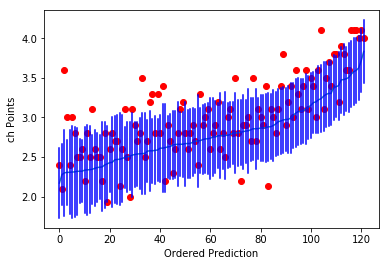

100%|██████████| 500/500 [00:00<00:00, 736.33it/s]


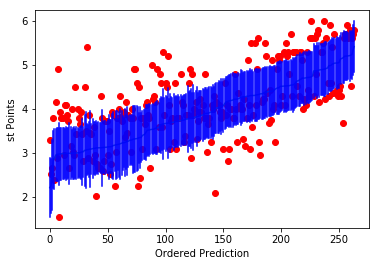

100%|██████████| 500/500 [00:00<00:00, 845.82it/s] 


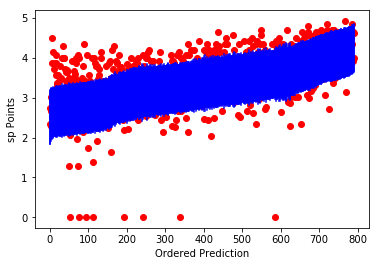

100%|██████████| 500/500 [00:00<00:00, 917.25it/s]


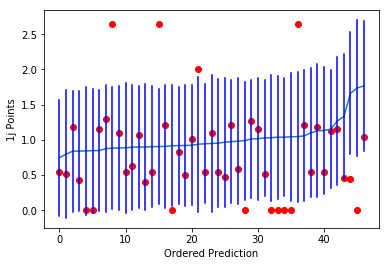

100%|██████████| 500/500 [00:00<00:00, 632.48it/s]


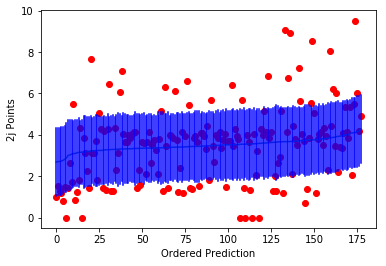

100%|██████████| 500/500 [00:00<00:00, 688.07it/s]


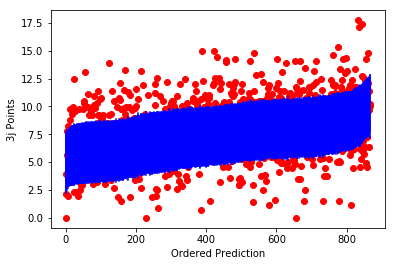

100%|██████████| 500/500 [00:00<00:00, 818.69it/s]


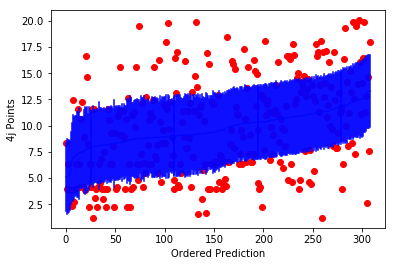

In [40]:
for elt_type in ELT_TYPES:
    elts = elements18[elements18.elt_type == elt_type]
    results[elt_type][2][0].set_value(np.asarray(elts.skater_code))
    results[elt_type][2][1].set_value(np.asarray(elts.log_overall_start))
    results[elt_type][2][2].set_value(np.asarray(elts.log_skater_start))
    results[elt_type][2][3].set_value(np.asarray(elts.is_gpf))
    results[elt_type][2][4].set_value(np.asarray(elts.is_ecfc))
    results[elt_type][2][5].set_value(np.asarray(elts.is_wc))
    results[elt_type][2][6].set_value(np.asarray(elts.is_owg))
    
    ppc[elt_type] = pm.sample_ppc(trace=results[elt_type][0], model=results[elt_type][1], samples=500)['y_' + elt_type]

    mean = means[elt_type] = ppc[elt_type].mean(axis=0)
    std = np.std(ppc[elt_type], axis=0)
    order = pd.Series(mean).sort_values().index
    outcomes = []
    for index in order:
        outcomes.append(elts.iloc[index].points)
    plt.scatter(xrange(len(mean)), outcomes, color='r')
    plt.plot(xrange(len(mean)), [mean[x] for x in order])
    for i, m, s in zip(xrange(len(mean)), mean[order], std[order]):
        plt.plot([i,i], [m-s, m+s], 'b-')
    plt.ylabel(elt_type + ' Points');plt.xlabel('Ordered Prediction');
    plt.show()

100%|██████████| 500/500 [00:00<00:00, 1087.78it/s]


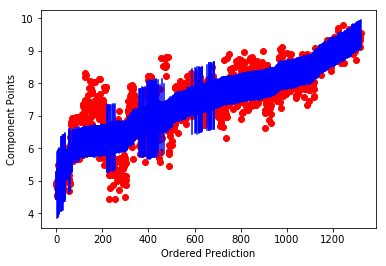

In [49]:
comps = components18
results['component'][2][0].set_value(np.asarray(comps.skater_code))
results['component'][2][1].set_value(np.asarray(comps.log_overall_start))
results['component'][2][2].set_value(np.asarray(comps.log_skater_start))
results['component'][2][3].set_value(np.asarray(comps.is_gpf))
results['component'][2][4].set_value(np.asarray(comps.is_ecfc))
results['component'][2][5].set_value(np.asarray(comps.is_wc))
results['component'][2][6].set_value(np.asarray(comps.is_owg))

ppc['component'] = pm.sample_ppc(trace=results['component'][0],
                                 model=results['component'][1], samples=500)['y_comp']

mean = means['component'] = ppc['component'].mean(axis=0)
std = np.std(ppc['component'], axis=0)
order = pd.Series(mean).sort_values().index
outcomes = []
for index in order:
    outcomes.append(comps.iloc[index].points)
plt.scatter(xrange(len(mean)), outcomes, color='r')
plt.plot(xrange(len(mean)), [mean[x] for x in order])
for i, m, s in zip(xrange(len(mean)), mean[order], std[order]):
    plt.plot([i,i], [m-s, m+s], 'b-')
plt.ylabel('Component Points');plt.xlabel('Ordered Prediction');
plt.show()

In [43]:
elt_predictions = elements18[['segment', 'event', 'element', 'elt_type', 'points', 'skater', 'skater_code']].copy()
comp_predictions = components18[['comp_type', 'event', 'segment', 'points', 'skater', 'skater_code']].copy()

In [44]:
elt_pred_col = []
elt_indices = {elt_type: 0 for elt_type in ELT_TYPES}
for index, row in elt_predictions.iterrows():
    elt_pred_col.append(means[row.elt_type][elt_indices[row.elt_type]])
    elt_indices[row.elt_type] += 1

In [50]:
elt_predictions['prediction'] = elt_pred_col
comp_predictions['prediction'] = means['component']

In [51]:
comp_predictions.rename(columns={'comp_type': 'elt_type'}, inplace=True)
elt_predictions['is_elt'] = pd.Series([1] * len(elt_pred_col))
comp_predictions['is_elt'] = pd.Series([0] * len(comp_predictions))

In [52]:
predictions = pd.concat([elt_predictions, comp_predictions])
predictions.to_csv('fits/men_predictions4.csv')